<a href="https://colab.research.google.com/github/bkestelman/dasy-ml/blob/master/dasy_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dasy-ml

In [2]:
!pip install -U matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from dasy.synthesizers.gaussian import GaussianSynth
from dasy.labelers.centroids import CentroidsLabeler

In [29]:
def main():
    dim = 2
    #plt.gca().set_aspect('equal', adjustable='box')
    #fig, ax = plt.subplots()
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    f.suptitle('Gaussian Data with Centroids Labeling')
    ax1.set_aspect('equal', adjustable='box')
    ax2.set_aspect('equal', adjustable='box')
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-2, 2)
    ax2.set_xlim(-2, 2)
    ax2.set_ylim(-2, 2)

    synth = GaussianSynth()
    data = synth.sample(n=100, dim=dim)
    #plt.scatter(data.T[0], data.T[1])
    #plt.show()

    labeler = CentroidsLabeler(classes=2, dim=dim)
    labels = labeler.assign(data)
    ax1.scatter(data.T[0], data.T[1], c=labels)
    ax1.scatter(labeler.centroids.T[0], labeler.centroids.T[1], c='r')
    ax1.plot(labeler.centroids.T[0], labeler.centroids.T[1], '--')
    plot_bisectors(labeler.centroids[0], labeler.centroids[1], ax=ax1)
    ax1.title.set_text('classes=2')
    #plt.show()

    labeler = CentroidsLabeler(classes=3, dim=dim)
    labels = labeler.assign(data)
    ax2.scatter(data.T[0], data.T[1], c=labels)
    ax2.scatter(labeler.centroids.T[0], labeler.centroids.T[1], c='r')
    #plt.plot(labeler.centroids.T[0], labeler.centroids.T[1], '--')
    plot_bisectors(labeler.centroids[0], labeler.centroids[1], ax=ax2)
    plot_bisectors(labeler.centroids[0], labeler.centroids[2], ax=ax2)
    plot_bisectors(labeler.centroids[1], labeler.centroids[2], ax=ax2)

  # extension to 4 classes:
    # plot_bisectors(labeler.centroids[0], labeler.centroids[3], ax=ax2)
    # plot_bisectors(labeler.centroids[1], labeler.centroids[3], ax=ax2)
    # plot_bisectors(labeler.centroids[2], labeler.centroids[3], ax=ax2)

    ax2.title.set_text('classes=3')
    plt.tight_layout()
    plt.show()


In [30]:
def plot_bisectors(a, b, ax=plt):
    midpoint = (a + b) / 2
    slope = - (b[0] - a[0]) / (b[1] - a[1])
    #plt.plot([midpoint[0], midpoint[0] + 1], [midpoint[1], midpoint[1] + slope], '-')
    ax.axline((midpoint[0], midpoint[1]), slope=slope, linestyle='--')


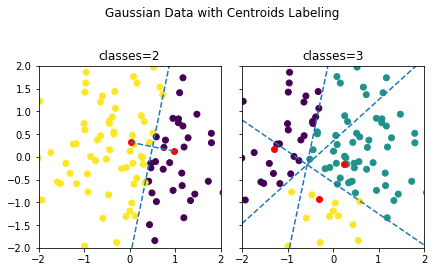

In [38]:
main()